# Jonathan Halverson
# Thursday, June 1, 2017
# Eigenvector centrality, betweenness and PageRank

Here we explore three definitions of centrality.

In [23]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" }
]

friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [25]:
G = nx.Graph(friendships)

Degree centrality appears to be the number of connections per node divided by N - 1, where N is the total number of nodes.

In [26]:
nx.degree_centrality(G)

{0: 0.2222222222222222,
 1: 0.3333333333333333,
 2: 0.3333333333333333,
 3: 0.3333333333333333,
 4: 0.2222222222222222,
 5: 0.3333333333333333,
 6: 0.2222222222222222,
 7: 0.2222222222222222,
 8: 0.3333333333333333,
 9: 0.1111111111111111}

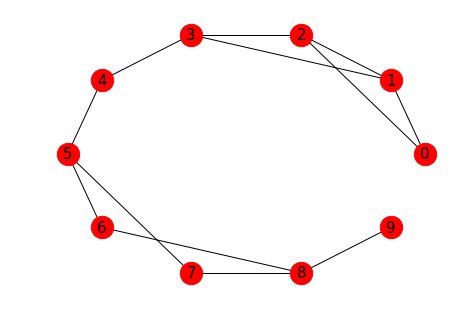

In [27]:
nx.draw_circular(G, node_size=500, font_size=15, with_labels=True)

### Betweenness centrality

This is computed as the proportion of cases where a node is on the shortest path between all unique pairs of nodes.

In [28]:
bc = nx.betweenness_centrality(G)
bc

{0: 0.0,
 1: 0.09722222222222221,
 2: 0.09722222222222221,
 3: 0.5,
 4: 0.5555555555555556,
 5: 0.5694444444444444,
 6: 0.16666666666666666,
 7: 0.16666666666666666,
 8: 0.2361111111111111,
 9: 0.0}

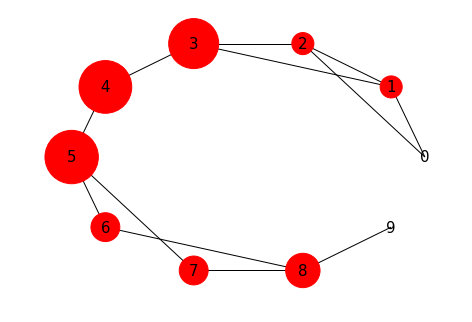

In [29]:
nx.draw_circular(G, node_size=5000 * np.array(bc.values()), font_size=15, with_labels=True)

### Eigenvector centrality

In [30]:
ec = nx.eigenvector_centrality(G)
ec

{0: 0.3857806330238402,
 1: 0.5147904415462464,
 2: 0.5147904415462464,
 3: 0.4733128564267259,
 4: 0.23360901037736012,
 5: 0.15014567695759723,
 6: 0.08355339653674904,
 7: 0.08355339653674904,
 8: 0.07284004706023027,
 9: 0.027293571957586967}

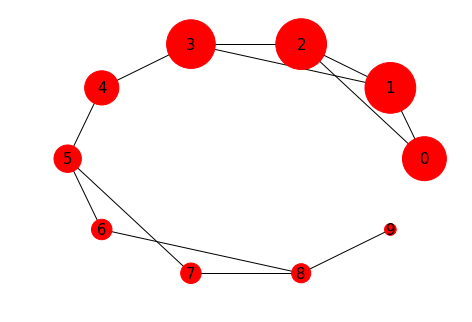

In [31]:
nx.draw_circular(G, node_size=5000 * np.array(ec.values()), font_size=15, with_labels=True)

Let's compute the same manually. First, let's form the adjency matrix:

In [32]:
n = len(G.nodes())
M = [[1 if (i, j) in friendships or (j, i) in friendships else 0 for j in range(0, n)] for i in range(0, n)]
M

[[0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]

In [33]:
eigenvalues, eigenvectors = np.linalg.eigh(M)
for val, vec in zip(eigenvalues, eigenvectors):
     print val, vec

-2.28606304256 [ -7.78306087e-02   3.96167522e-01   4.16333507e-01   9.21118498e-02
   5.19529199e-01  -9.47634626e-17   3.91121194e-01   2.54977291e-01
   1.35826264e-01  -3.85780947e-01]
-1.76854651479 [  8.89628390e-02  -3.50320345e-01  -5.54165312e-02  -7.36466940e-01
  -9.58587819e-02  -3.92523114e-17   7.80927283e-02   1.44164731e-01
   1.51084740e-01  -5.14790516e-01]
-1.0 [  8.89628390e-02  -3.50320345e-01  -3.60916976e-01   6.44355090e-01
  -9.58587819e-02   3.92523115e-17   7.80927283e-02   1.44164731e-01
   1.51084740e-01  -5.14790516e-01]
-1.0 [ -2.14506889e-01   5.73710649e-01   4.44089210e-16   1.11022302e-16
  -3.88296444e-01   9.47634627e-17  -4.38029346e-01  -2.36119899e-01
   4.92036477e-02  -4.73313262e-01]
-0.369021729521 [  3.12450593e-01  -3.13993278e-01   4.16333507e-01   9.21118498e-02
   3.35007389e-01   1.03397564e-25  -3.31102630e-01  -5.55334901e-01
  -1.92707288e-01  -2.33608249e-01]
-9.02056207508e-17 [ -4.99774864e-01  -1.83989314e-02  -4.16333507e-01  -9

Let's check that the eigenvector does not undergo rotation when transformed by the matrix:

In [34]:
eigenvalues[0] * eigenvectors[:, 0]

array([ 0.17792568, -0.20337466, -0.20337466,  0.49037627, -0.71428175,
        1.14251685, -0.94879189, -0.94879189,  1.02648123, -0.44901703])

In [35]:
np.dot(M, eigenvectors[:, 0])

array([ 0.17792568, -0.20337466, -0.20337466,  0.49037627, -0.71428175,
        1.14251685, -0.94879189, -0.94879189,  1.02648123, -0.44901703])

We see there is not an eigenvector with all positive elements as indicated by Grus (pg. 262).

In [36]:
for i in range(n):
     print eigenvectors[:, i]

[-0.07783061  0.08896284  0.08896284 -0.21450689  0.31245059 -0.49977486
  0.41503313  0.41503313 -0.44901703  0.19641498]
[ 0.39616752 -0.35032035 -0.35032035  0.57371065 -0.31399328 -0.01839893
  0.17326632  0.17326632 -0.28803062  0.1628629 ]
[  4.16333507e-01  -5.54165312e-02  -3.60916976e-01   4.44089210e-16
   4.16333507e-01  -4.16333507e-01   1.94289029e-16   1.66533454e-16
   4.16333507e-01  -4.16333507e-01]
[  9.21118498e-02  -7.36466940e-01   6.44355090e-01   1.11022302e-16
   9.21118498e-02  -9.21118498e-02  -1.11022302e-16   0.00000000e+00
   9.21118498e-02  -9.21118498e-02]
[ 0.5195292  -0.09585878 -0.09585878 -0.38829644  0.33500739  0.26467144
 -0.21633845 -0.21633845 -0.18483785  0.50088608]
[ -9.47634626e-17  -3.92523114e-17   3.92523115e-17   9.47634627e-17
   1.03397564e-25  -9.47634626e-17  -7.07106781e-01   7.07106781e-01
   0.00000000e+00   1.11022302e-16]
[ 0.39112119  0.07809273  0.07809273 -0.43802935 -0.33110263  0.30581095
  0.22661068  0.22661068 -0.21531907

### PageRank

In [37]:
endorsements = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3),
                (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

In [38]:
DG = nx.DiGraph(endorsements)

In [39]:
ec = nx.pagerank(DG, alpha=0.85)

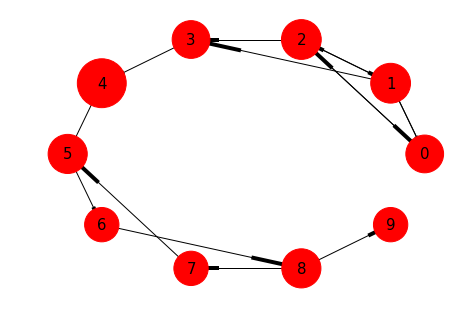

In [40]:
nx.draw_circular(DG, node_size=15000 * np.array(ec.values()), font_size=15, with_labels=True)